# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


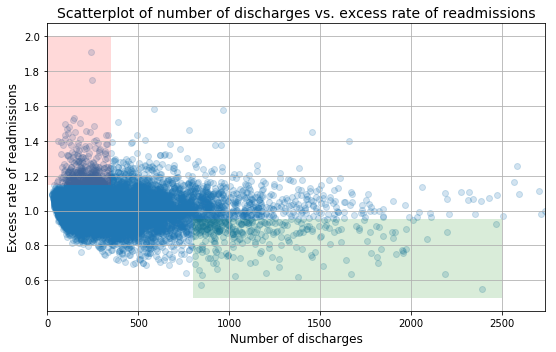

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# Your turn
The assertion put forth in the above analysis is that hospitals with high discharge rates lead to a smaller excess readmissions ratio. Specifically, hospitals with less than 300 discharges would be subject to greater regulation, so the hypothesis I wish to test is that hospitals with less than 300 discharges have a higher excess readmissions ratio than hospitals with discharges greater than 300.

In order to accomplish this, I set up a split in the data for "small hospitals" and "big hospitals" the null hypothesis is that the mean excess readmissions ratio for big hospitals is smaller than it is for small hospitals.

In [116]:
sizemask = clean_hospital_read_df['Number of Discharges'] <= 300
namask = clean_hospital_read_df['Excess Readmission Ratio'].notna()
small_df = clean_hospital_read_df[sizemask & namask]
small_err = small_df['Excess Readmission Ratio']
big_df = clean_hospital_read_df[~sizemask & namask]
big_err = big_df['Excess Readmission Ratio'] 

In [157]:
small_mean_err = small_err.mean()
small_var_err = small_err.var()
small_n = len(small_err)

big_mean_err = big_err.mean()
big_var_err = big_err.var()
big_n = len(big_err)

In [162]:
#The easy way
from scipy import stats
t, p = stats.ttest_ind(small_err,big_err,equal_var = False)
print('Using scipy, the t-statistic is: ',round(t,2),' and the p value is: ',p)

#The math way
t_statistic = (small_mean_err - big_mean_err)/np.sqrt(small_var_err/small_n + big_var_err/big_n)
df = small_n + big_n - 2
p_value = (1 - stats.t.cdf(t_statistic,df=df))
print('Calculating directly, the t-statistic is: ',round(t_statistic,2),' and the p value is: ',p_value/2)

#Significance when alpha = 0.01
t_ppf = stats.t.ppf(0.99,df)*np.sqrt(small_var_err/small_n + big_var_err/big_n)
significance = (t_ppf < t_statistic)
if significance == True:
    statement = 'is'
else:
    statement = 'is not'
print('The difference of the means of the two population',statement,'statistically significant at an alpha level of 0.01.')

Using scipy, the t-statistic is:  8.33  and the p value is:  8.769147186155098e-17
Calculating directly, the t-statistic is:  8.33  and the p value is:  5.551115123125783e-17
The difference of the means of the two population is statistically significant at an alpha level of 0.01.


I can also see graphically that the means of the two populations are clearly different. The hypothesis that hospitals with discharges greater and less than 300 have the same Excess Readmissions Ratio is rejected, and the alternative hypothesis that the mean is greater for small hospitals is accepted. 

So in the sense that there is indeed a measurable difference between hospitals with discharges greater and less than 300, I agree with the given analysis. However, this recommendation does not directly take into account other important variables. There may be a legitimate need for many of the hospitals to be smaller, and the cost of upgrading facilities may be prohibitive. Also, one should ask if putting extra requirements on the hospitals who are having the most difficulty is a productive approach.

Finally, the sheer numbers of the problem may make the return on investment less obvious. If we multiply discharges and the excess readmission ratio, we'll get the total excess readmissions.

In [ ]:
import matplotlib.pyplot as plt

_ = plt.hist(small_err,color='red',bins = 50,alpha = 0.5)
_ = plt.hist(big_err,color = 'blue',bins = 50,alpha = 0.5)

In [ ]:
err = np.arange(0.85,1.2,0.01)
q_small = [np.sum(small_err<=an_err)/len(small_err) for an_err in err]
q_big = [np.sum(big_err<=an_err)/len(big_err) for an_err in err]
_ = plt.plot(err,q_small,color = 'blue')
_ = plt.plot(err,q_big,color = 'red')
_ = plt.plot((small_mean_err,small_mean_err),(0,1),color='green')
_ = plt.plot((big_mean_err,big_mean_err),(0,1),color = 'orange')

In [221]:
small_ner = np.sum(small_df['Number of Readmissions']-small_df['Expected Readmission Rate'])
big_ner = np.sum(big_df['Number of Readmissions']-big_df['Expected Readmission Rate'])
print('Small hospitals readmit', np.int(round(small_ner/1000,0)),'thousand too many patients,',
      'and big hospitals readmit', np.int(round(big_ner/1000,0)), 'thousand too many patients.')
excess = big_df[big_df['Number of Readmissions']-big_df['Expected Readmission Rate']>100]
my_recc  = np.sum(excess['Number of Readmissions']-excess['Expected Readmission Rate']-100)

Small hospitals readmit 79 thousand too many patients, and big hospitals readmit 447 thousand too many patients.


So hospitals larger than 300 discharges are readmitting more patients than smaller hospitals despite the lower ERR. This is because larger hospitals are... larger. The ERR is a good way to compare hospitals against each other, but if the goal is to reduce readmissions, the higher standards should be placed on the larger hospitals.

Below is a plot of Excess Readmissions vs Number of Discharges. Two clear groups stick out, one group has the number of Excess Readmissions rise much more rapidly with Discharges than the other. A better reccommendation would target the hospitals with a large Excess Readmission Rate compared to its Discharges. I have drawn a green line at 100 excess readmissions. By using this as a threshold for corrective action, the ideal result would be:

In [223]:
print('a reduction of',np.int(round(my_recc/1000,0)),'thousand excess readmissions')

a reduction of 241 thousand excess readmissions


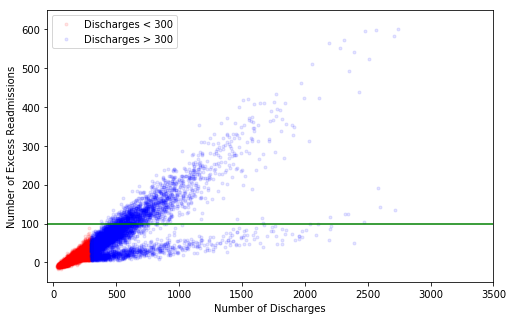

In [220]:
import matplotlib.pyplot as plt
small_nr = small_df['Number of Readmissions']-small_df['Expected Readmission Rate']
big_nr = big_df['Number of Readmissions']-big_df['Expected Readmission Rate']
fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(x = small_df['Number of Discharges'],y=small_nr,
           color='red',marker = '.',alpha = 0.1, label = 'Discharges < 300')
ax.scatter(x = big_df['Number of Discharges'],y=big_nr,
           color = 'blue',marker = '.',alpha = 0.1, label = 'Discharges > 300')
ax.set_xlim([-50,3500])
ax.set_ylim([-50,650])
ax.set_xlabel('Number of Discharges')
ax.set_ylabel('Number of Excess Readmissions')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.hlines(100, -50, 3500, color='green')
plt.show()